# 程序说明
该程序是一个包含两个隐藏层的神经网络。

数据集：MNIST

In [11]:
cd /home/chenxupeng/projects/practice/

/home/chenxupeng/projects/practice


## 1.加载keras模块

In [22]:
from __future__ import print_function
%pylab inline
import numpy as np
np.random.seed(1337)  # for reproducibility

Populating the interactive namespace from numpy and matplotlib


In [38]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from load_data import load_mnist_2d
from keras.callbacks import TensorBoard

## 2.变量初始化

In [5]:
batch_size = 128 
nb_classes = 10
nb_epoch = 20 

## 3.准备数据

In [17]:
X_train, X_test, Y_train, Y_test = load_mnist_2d('data')

In [19]:
X_train[0].shape

(784,)

### 查看数据

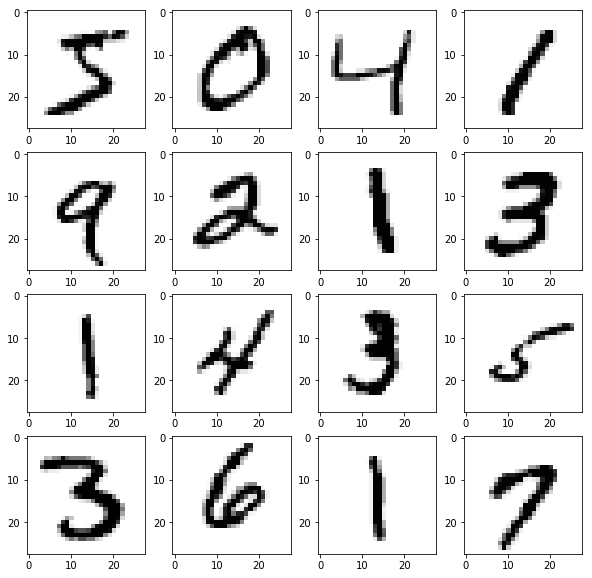

In [27]:
fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(X_train[4*i+j].reshape(28,28),cmap=cm.Greys)

In [20]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [35]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 4.建立模型
### 使用Sequential（）

In [29]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

### 打印模型

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

## 5.训练与评估
### 编译模型

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'],)

### 迭代训练

In [40]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test),
                    callbacks=[TensorBoard(log_dir='log/')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0783 - acc: 0.9817 - val_loss: 0.1207 - val_acc: 0.9789
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0749 - acc: 0.9819 - val_loss: 0.1137 - val_acc: 0.9801
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0792 - acc: 0.9822 - val_loss: 0.1277 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0804 - acc: 0.9817 - val_loss: 0.0970 - val_acc: 0.9826
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0776 - acc: 0.9823 - val_loss: 0.1431 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0792 - acc: 0.9819 - val_loss: 0.1181 - val_acc: 0.9816
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0736 - acc: 0.9835 - val_loss: 0.1144 - val_acc

### 模型评估

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.11684127673
Test accuracy: 0.9849
